In [45]:
'''Trains a simple RNN-LSTM on sine waveform data.
'''
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import seed, random

np.random.seed(1337)  # for reproducibility

# Simulate data
dates = pd.date_range(start='2009-01-01', end='2015-12-31', freq='D')
n = len(dates)
a = np.sin(np.arange(n) * 2 * np.pi / 7)
# b = np.sin(np.arange(n) * 2 * np.pi / 7)
# c = np.sin(np.arange(n) * 2 * np.pi / 7)
# pdata = pd.DataFrame({"a":a, "b":b, "c":c})
pdata = pd.DataFrame({"a":a}, index=dates)
data = pdata

In [46]:
n

2556

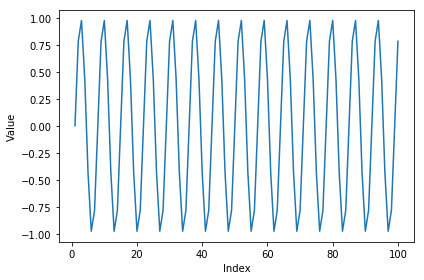

In [12]:
# visualize data
n_plot = 100
plt.figure()
plt.plot(range(1, n_plot+1), data.a[:n_plot])
plt.xlabel('Index')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

In [13]:
def _load_data(data, n_prev = 100):
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data.iloc[i+n_prev].as_matrix())
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(df, test_size=0.1):  
    """
    This just splits data to training and testing parts
    """
    ntrn = int(round(len(df) * (1 - test_size)))

    X_train, y_train = _load_data(df.iloc[0:ntrn])
    X_test, y_test = _load_data(df.iloc[ntrn:])
    return (X_train, y_train), (X_test, y_test)

# retrieve data
(X_train, y_train), (X_test, y_test) = train_test_split(data)

In [37]:
# define model structure
in_out_neurons = 1
hidden_neurons = 300
model = Sequential()
model.add(LSTM(input_shape=(None, in_out_neurons), units=hidden_neurons, return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
model.compile(loss="mean_squared_error", optimizer="rmsprop", )

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 300)               362400    
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 301       
_________________________________________________________________
activation_13 (Activation)   (None, 1)                 0         
Total params: 362,701
Trainable params: 362,701
Non-trainable params: 0
_________________________________________________________________


In [43]:
y_train.shape

(2200, 1)

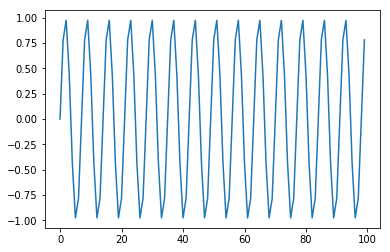

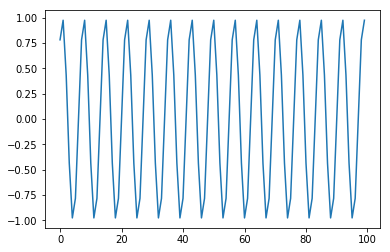

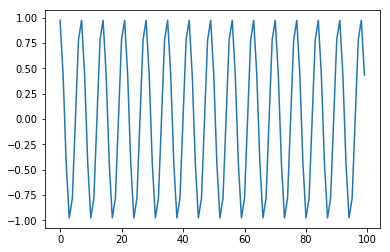

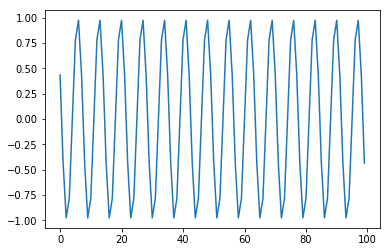

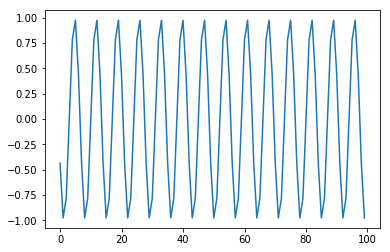

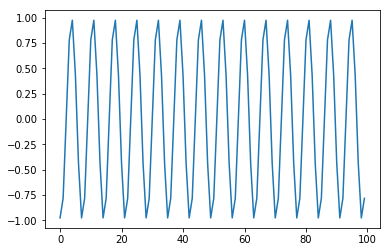

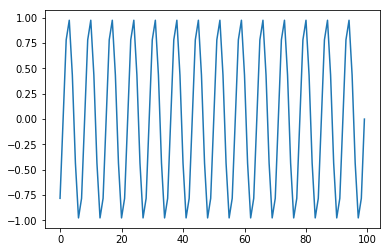

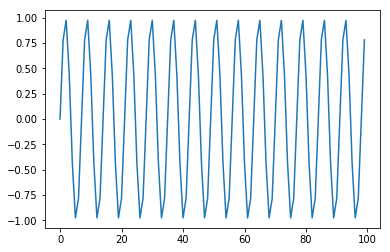

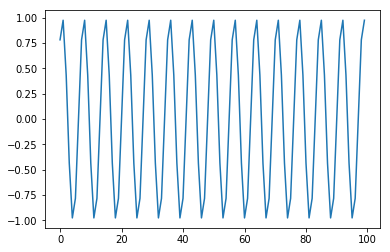

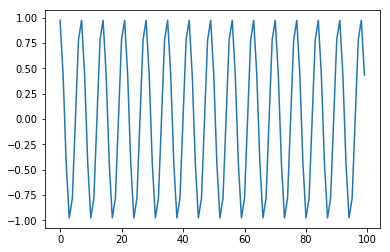

In [39]:

for g in X_train[:10]:
    plt.plot(g)
    plt.show()

In [40]:
# and now train the model
# batch_size should be appropriate to your memory size
# number of epochs should be higher for real world problems
model.fit(X_train, y_train, batch_size=50, nb_epoch=10, validation_split=0.05)

/usr/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 2090 samples, validate on 110 samples
Epoch 1/10
1050/2090 [==============>...............] - ETA: 7s - loss: 0.1187

KeyboardInterrupt: 

In [ ]:
# evaluate model fit
score = model.evaluate(X_test, y_test)
print('Test score:', score)

In [ ]:
# visualize predictions
train_prediction = model.predict(X_train)
test_prediction = model.predict(X_test)

_, axarr = plt.subplots(5, sharex=True, sharey=True)
axarr[0].plot(a[(len(a) - n_plot):len(a)])
axarr[0].set_title('Test Population')
axarr[1].plot(y_test[:n_plot])
axarr[1].set_title('Test Observation')
axarr[2].plot(test_prediction[:n_plot])
axarr[2].set_title('Prediction')
axarr[3].plot(y_test[:n_plot])
axarr[3].plot(test_prediction[:n_plot])
axarr[3].set_title('Test Observation and Prediction')
axarr[4].plot(a[(len(a) - n_plot):len(a)])
axarr[4].plot(test_prediction[:n_plot])
axarr[4].set_title('Test Population and Prediction')

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line

(6084, 200, 1)
Train on 5475 samples, validate on 609 samples
Epoch 1/15
5475/5475 [==============================] - 2s 319us/step - loss: 0.0451 - val_loss: 0.0034
Epoch 2/15
5475/5475 [==============================] - 1s 126us/step - loss: 0.0021 - val_loss: 0.0014
Epoch 3/15
5475/5475 [==============================] - 1s 121us/step - loss: 0.0011 - val_loss: 9.9222e-04
Epoch 4/15
5475/5475 [==============================] - 1s 118us/step - loss: 8.6246e-04 - val_loss: 7.6845e-04
Epoch 5/15
5475/5475 [==============================] - 1s 118us/step - loss: 6.7272e-04 - val_loss: 6.0941e-04
Epoch 6/15
5475/5475 [==============================] - 1s 119us/step - loss: 5.3374e-04 - val_loss: 4.8942e-04
Epoch 7/15
5475/5475 [==============================] - 1s 121us/step - loss: 4.3923e-04 - val_loss: 4.1160e-04
Epoch 8/15
5475/5475 [==============================] - 1s 119us/step - loss: 3.7417e-04 - val_loss: 3.5816e-04
Epoch 9/15
5475/5475 [==============================] - 1s 126

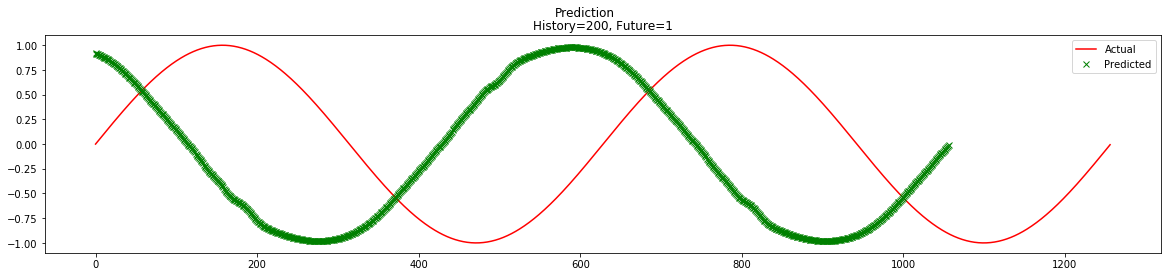

In [51]:
# Simple example using recurrent neural network to predict time series values

from __future__ import division, print_function, absolute_import

import numpy as np
import matplotlib.pyplot as plt
import keras
import keras.layers as kl
import math
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

step_radians = 0.01
steps_of_history = 200
steps_in_future = 1
index = 0

x = np.sin(np.arange(0, 20*math.pi, step_radians))

seq = []
next_val = []

for i in range(0, len(x) - steps_of_history, steps_in_future):
    seq.append(x[i: i + steps_of_history])
    next_val.append(x[i + steps_of_history])

seq = np.reshape(seq, [-1, steps_of_history, 1])
next_val = np.reshape(next_val, [-1, 1])
print(np.shape(seq))

trainX = np.array(seq)
trainY = np.array(next_val)

# Network building
#net = tflearn.regression(net, optimizer='sgd', loss='mean_square', learning_rate=0.1)
model = keras.Sequential()
model.add(kl.InputLayer((steps_of_history, 1)))
model.add(kl.SimpleRNN(32))
model.add(kl.Dense(1))
model.compile("sgd", 'mse')

# Training
model.fit(trainX, trainY, epochs=15, validation_split=0.1, batch_size=128)

# Testing
x = np.sin(np.arange(20*math.pi, 24*math.pi, step_radians))

seq = []

for i in range(0, len(x) - steps_of_history, steps_in_future):
    seq.append(x[i: i + steps_of_history])

seq = np.reshape(seq, [-1, steps_of_history, 1])
testX = np.array(seq)

# Predict the future values
predictY = model.predict(testX)
print(predictY)

# Plot the results
plt.figure(figsize=(20,4))
plt.suptitle('Prediction')
plt.title('History='+str(steps_of_history)+', Future='+str(steps_in_future))
plt.plot(x, 'r-', label='Actual')
plt.plot(predictY, 'gx', label='Predicted')
plt.legend()
plt.savefig('sine.png')